# Robot path planning: deterministic vs stochastic


The goal of this exercise is to understand the differences between stochastic 
dynamic programming and dynamic programming for a simple example where an agent/robot 
must move from left to right in a given environment. For this example the environment 
in Figure 1 is considered. The goal for the robot is to move from initial stage 
$0$ to final state $h$ in minimum time.


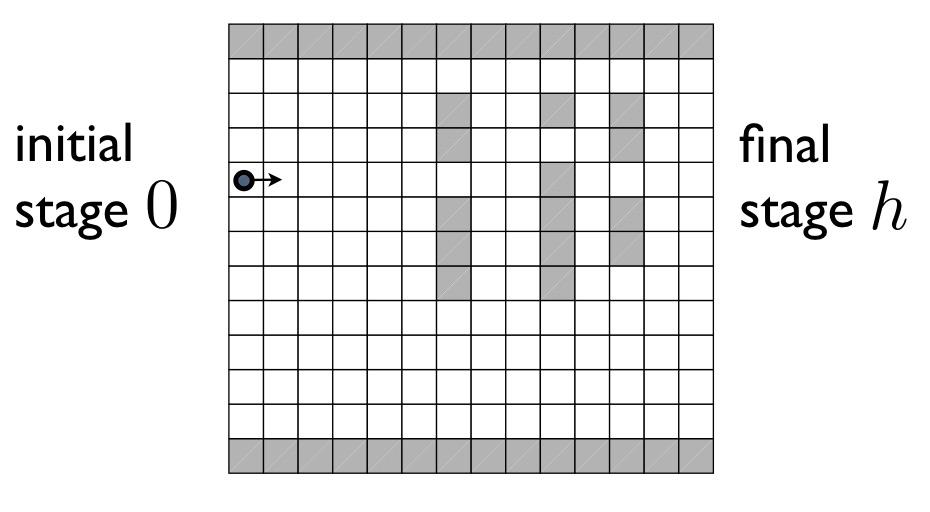
<center>Figure 1: Considered environment</center>

Let us start by considering a deterministic model according to the following 
rules. If the robot is not stuck in an obstacle or in a wall it can go up, straight 
or down. Otherwise, there is only one option (see Figure 2). If the robot is 
not stuck in an obstacle or in a wall it can go up, straight or down. Otherwise, 
there is only one option (see Figure 2). It takes I time unit to move horizontally 
from stage $i$ to stage $i+1$ and $\sqrt{2}$ time units to move diagonally. 
$c$ time units are paid every time an obstacle or a wall is hit.


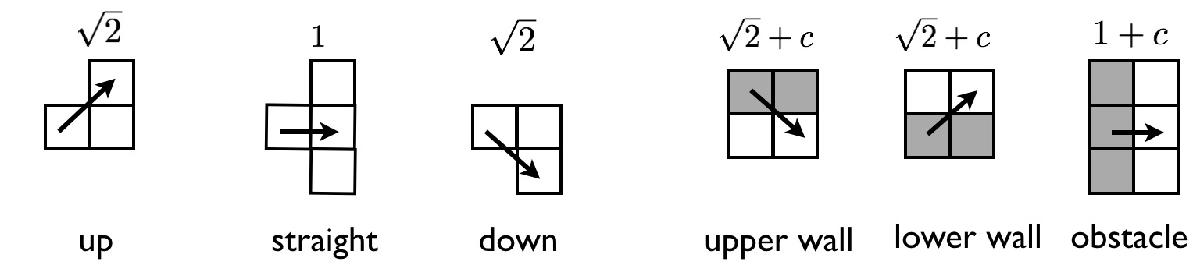
<center>Figure 2: Possible actions in the deterministic version</center>

This problem can be written in the DP framework for a transition diagram obtained 
from the rules of the problem, leading to the following iteration for the costs-to-go:

for $k=h$: $J_h(i)=0$ for every $i \in \{1,\dots,n\}$

for $k\in\{h-1,h-2,\dots,1,0\}$:

$J_{k}(1) =\sqrt{2}+c+J_{k+1}(2) $

$ J_{k}(n) =\sqrt{2}+c+J_{k+1}(n-1)$

and, for $i\in\{2,\dots,n-1\}$,

$ J_{k}(i) =\min \left\{1+J_{k+1}(i), \sqrt{2}+J_{k+1}(i+1), \sqrt{2}+J_{k+1}(i-1)\right\}$ 
(not an obstacle node)

$J_{k}(i) =1+c+J_{k+1}(i) $ (obstacle node)

Now assume that for regular nodes (no obstacles) the evolution of the state 
is stochastic for every stage and state and the actions of the robot have the 
stochastic behavior depicted in Figure 3


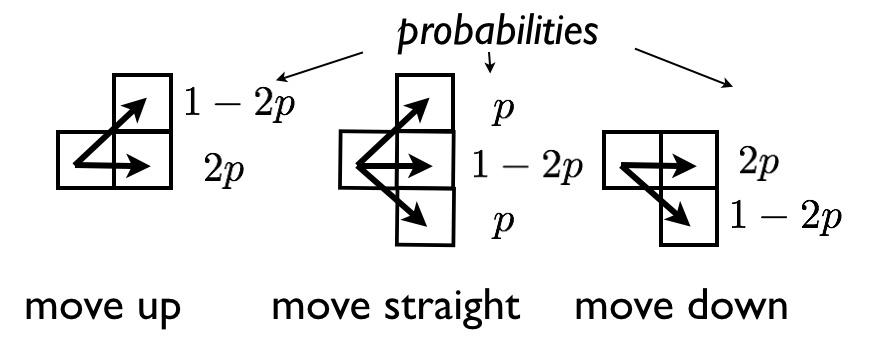
<center>Figure 3: Possible actions and outcomes in the stochastic version</center>

Applying the stochastic dynamic programming algorithm leads now to the equations

for $k=h$: $J_h(i)=0$ for every $i \in \{1,\dots,n\}$

for $k\in\{h-1,h-2,\dots,1,0\}$:

$J_{k}(1) =\sqrt{2}+c+J_{k+1}(2) $

$J_{k}(n) =\sqrt{2}+c+J_{k+1}(n-1)$

and, for $i\in\{2,\dots,n-1\}$,

$J_{k}(i)=\min \{(1-2 p)\left(1+J_{k+1}(i)\right)+p\left(\sqrt{2}+J_{k+1}(i+1)\right)+p\left(\sqrt{2}+J_{k+1}(i-1)\right) 
, $

$2 p\left(1+J_{k+1}(i)\right)+(1-2 p)\left(\sqrt{2}+J_{k+1}(i+1)\right) ,$

$2 p\left(1+J_{k+1}(i)\right)+(1-2 p)\left(\sqrt{2}+J_{k+1}(i-1)\right)\}$ 
(not an obstable node)

$J_{k}(i) =1+c+J_{k+1}(i) $ (obstable node)

The following code provides and plots the optimal policy for both deterministic 
and stochastic settings.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

np.set_printoptions(precision = 4)
plt.rcParams["figure.figsize"] = (20, 10)

In [ ]:
def robotpathplanningBellman(M, c):
    [n, m] = M.shape
    J = np.zeros([n, m])

    u = [[[] for _ in range(n)] for _ in range(n)]

    for k in range(m - 2, -1, -1):
        J[n - 1, k] = np.sqrt(2) + c + J[n - 2, k + 1]
        u[n - 1][k] = 3      # "DOWN"
        J[0, k] = np.sqrt(2) + c + J[1, k + 1]
        u[0][k] = 2          # "UP"
        for i in range(1, n - 1):
            if M[i, k] == 0:
                J[i, k] = 1 + c + J[i, k + 1]
                u[i][k] = 1  # "STRAIGHT"
            else:
                J[i, k] = np.min([1 + J[i, k + 1], np.sqrt(2) + J[i + 1, k + 1], np.sqrt(2) + J[i - 1, k + 1]])
                dec = np.argmin([1 + J[i, k + 1], np.sqrt(2) + J[i + 1, k + 1], np.sqrt(2) + J[i - 1, k + 1]])
                if dec == 0:
                    u[i][k] = 1  # "STRAIGHT"
                elif dec == 1:
                    u[i][k] = 2  # "UP"
                elif dec == 2:
                    u[i][k] = 3  # "DOWN"
    return J, u

In [ ]:
def stochasticrobotpathplanningBellman(M, c, p):
    [n, m] = M.shape
    J = np.zeros([n, m])

    u = [[[] for _ in range(n)] for _ in range(n)]

    for k in range(m - 2, -1, -1):
        J[n - 1, k] = np.sqrt(2) + c + J[n - 2, k + 1]
        u[n - 1][k] = 3       # "DOWN"
        J[0, k] = np.sqrt(2) + c + J[1, k + 1]
        u[0][k] = 2           # "UP"
        for i in range(1, n - 1):
            if M[i, k] == 0:
                J[i, k] = 1 + c + J[i, k + 1]

                u[i][k] = 1  # "STRAIGHT"
            else:
                J[i, k] = np.min([(1 - 2 * p) * (1 + J[i, k + 1]) + p * (np.sqrt(2) + J[i + 1, k + 1]) + p * (
                        np.sqrt(2) + J[i - 1, k + 1]),
                                  2 * p * (1 + J[i, k + 1]) + (1 - 2 * p) * (np.sqrt(2) + J[i + 1, k + 1]),
                                  2 * p * (1 + J[i, k + 1]) + (1 - 2 * p) * (np.sqrt(2) + J[i - 1, k + 1])])

                dec = np.argmin([(1 - 2 * p) * (1 + J[i, k + 1]) + p * (np.sqrt(2) + J[i + 1, k + 1]) + p * (
                        np.sqrt(2) + J[i - 1, k + 1]),
                                 2 * p * (1 + J[i, k + 1]) + (1 - 2 * p) * (np.sqrt(2) + J[i + 1, k + 1]),
                                 2 * p * (1 + J[i, k + 1]) + (1 - 2 * p) * (np.sqrt(2) + J[i - 1, k + 1])])
                if dec == 0:
                    u[i][k] = 1  # "STRAIGHT"
                elif dec == 1:
                    u[i][k] = 2  # "UP"
                elif dec == 2:
                    u[i][k] = 3  # "DOWN"

    return J, u

In [ ]:
def plotsquare(l, r, ax, color):
    rect = patches.Rectangle((l, r), 1, 1, facecolor=color, edgecolor='k')
    ax.add_patch(rect)

In [ ]:
def plottriangle(p, theta, ax):
    d1 = 0.30
    d2 = 0.06
    p1 = p
    p2 = p + np.array([-d1 * np.cos(theta) - d2 * np.sin(theta), 
                       -d1 * -np.sin(theta) - d2 * np.cos(theta)])
    p3 = p + np.array([-d1 * np.cos(theta) + d2 * np.sin(theta), 
                       -d1 * -np.sin(theta) + d2 * np.cos(theta)])
    tri = patches.Polygon(np.vstack([p3, p2, p1]), 20, facecolor='k', edgecolor='k')
    ax.add_patch(tri)

In [ ]:
def plotpathplanning(J, M, u):

    n2 = len(u)
    n1 = len(u[0])

    action = [[[] for _ in range(n2)] for _ in range(n1 - 1)]

    for j in range(0, n2):
        for i in range(0, n1):
            if i == 0:
                action[0][j] = np.array([2, j + 1 + 1])
            else:
                if i == n1 - 1:
                    action[0][j] = np.array([n1 - 1, j + 1 + 1])

                else:
                    if u[i][j] == 1:
                        action[i][j] = np.array([i + 1, j + 1 + 1])

                    elif u[i][j] == 2:
                        action[i][j] = np.array([i + 1 + 1, j + 1 + 1])

                    else:
                        action[i][j] = np.array([i, j + 1 + 1])

    [p, m] = M.shape
    deltapx = 0.2
    deltapy = 0.4

    fig, ax = plt.subplots(1)
    ax.set_xlim(1, m + 1)
    ax.set_ylim(1, p + 1)

    for r in range(0, p):
        for l in range(0, m):
            if M[r, l] == 0:
                plotsquare(l + 1, r + 1, ax, 'grey')
                plt.text(l + 1 + deltapx, r + 1 + deltapy, "%.2f"%J[r, l], fontsize=16)
                
            else:
                plotsquare(l + 1, r + 1, ax, 'white')
                plt.text(l + 1 + deltapx, r + 1 + deltapy, "%.2f"%J[r, l], fontsize=16)
  
    fig, ax = plt.subplots(1)
    ax.set_xlim(1, m + 1)
    ax.set_ylim(1, p + 1)

    for r in range(0, p):
        for l in range(0, m - 1):
            if M[r, l] == 0:
                plotsquare(l + 1, r + 1, ax, 'grey')
                
                if True:
                    if r == 0:
                        ax.plot([l + 1 + 0.25, l + 1 + 0.75], [r + 1 + 0.25, r + 1 + 0.75], 'k')
                        plottriangle(np.array([l + 1 + 0.75, r + 1 + 0.75]), -np.pi / 4, ax)
                        
                    else:
                        if r == p - 1:
                            ax.plot([l + 1 + 0.25, l + 1 + 0.75], [r + 1 + 0.75, r + 1 + 0.25], 'k')
                            plottriangle(np.array([l + 1 + 0.75, r + 1 + 0.25]), np.pi / 4, ax)
                            
                        else:
                            ax.plot([l + 1 + 0.25, l + 1 + 0.75], [r + 1 + 0.5, r + 1 + 0.5], 'k')
                            plottriangle(np.array([l + 1 + 0.75, r + 1 + 0.5]), 0, ax)
                            

            else:
                plotsquare(l + 1, r + 1, ax, 'white')
                
                actionrl = np.array2string(action[r][l] - [r + 1, l + 1])
                                
                if actionrl == np.array2string(np.array([0, 0])):
                    continue

                elif actionrl == np.array2string(np.array([-1, 1])):
                    ax.plot([l + 1 + 0.25, l + 1 + 0.75], [r + 1 + 0.75, r + 1 + 0.25], 'k')
                    plottriangle(np.array([l + 1 + 0.75, r + 1 + 0.25]), np.pi / 4, ax)

                elif actionrl == np.array2string(np.array([-1, 0])):
                    ax.plot([l + 1 + 0.5, l + 1 + 0.5], [r + 1 + 0.25, r + 1 + 0.75], 'k')
                    plottriangle(np.array([l + 1 + 0.5, r + 1 + 0.25]), np.pi / 2, ax)

                elif actionrl == np.array2string(np.array([-1, -1])):
                    ax.plot([l + 1 + 0.25, l + 1 + 0.75], [r + 1 + 0.25, r + 1 + 0.75], 'k')
                    plottriangle(np.array([l + 1 + 0.25, r + 1 + 0.25]), 3*np.pi / 4, ax)

                elif actionrl == np.array2string(np.array([0, -1])):
                    ax.plot([l + 1 + 0.25, l + 1 + 0.75], [r + 1 + 0.5, r + 1 + 0.5], 'k')
                    plottriangle(np.array([l + 1 + 0.25, r + 1 + 0.5]), np.pi, ax)

                elif actionrl == np.array2string(np.array([1, -1])):
                    ax.plot([l + 1 + 0.25, l + 1 + 0.75], [r + 1 + 0.75, r + 1 + 0.25], 'k')
                    plottriangle(np.array([l + 1 + 0.25, r + 1 + 0.75]), -3 * np.pi / 4, ax)

                elif actionrl == np.array2string(np.array([1, 0])):
                    ax.plot([l + 1 + 0.5, l + 1 + 0.5], [r + 1 + 0.25, r + 1 + 0.75], 'k')
                    plottriangle(np.array([l + 1 + 0.5, r + 1 + 0.75]), -np.pi / 2, ax)

                elif actionrl == np.array2string(np.array([1, 1])):
                    ax.plot([l + 1 + 0.25, l + 1 + 0.75], [r + 1 + 0.25, r + 1 + 0.75], 'k')
                    plottriangle(np.array([l + 1 + 0.75, r + 1 + 0.75]), -np.pi / 4, ax)

                elif actionrl == np.array2string(np.array([0, 1])):
                    ax.plot([l + 1 + 0.25, l + 1 + 0.75], [r + 1 + 0.5, r + 1 + 0.5], 'k')
                    plottriangle(np.array([l + 1 + 0.75, r + 1 + 0.5]), 0, ax)


    return

In [ ]:
M = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1],
              [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1],
              [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

c = 4
p = 0.1

[Jdet, udet] = robotpathplanningBellman(M, c)

In [ ]:
[J, u] = stochasticrobotpathplanningBellman(M, c, p)

In [ ]:
plotpathplanning(Jdet, M, udet)

In [ ]:
plotpathplanning(J, M, u)